# Neural Nets Intro

In [12]:
import numpy as np
from numpy.random import randn, seed
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

## The need for neural networks
**Why nnets?**

In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [4]:
seed(1643)
n = 100
x = np.linspace(0, 3, n).reshape(-1, 1)
noise = randn(n, 1)
p1 = np.poly1d([3, 1])
p2 = np.poly1d([-0.8, 0.1, 1])

### Linear Regression
Underlying model: $y = 3x + 1$

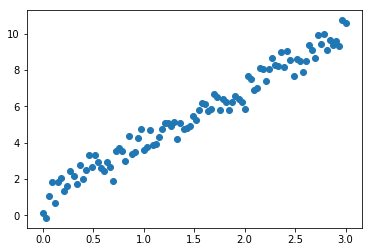

In [8]:
y = p1(x) + 0.5 * noise
plt.scatter(x, y)
plt.savefig("./images/model1.pdf")
plt.show()

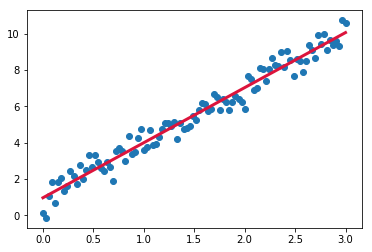

In [7]:
linm1 = LinearRegression()
linm1.fit(x, y)

plt.scatter(x, y)
plt.plot(x, linm1.predict(x), c="crimson", linewidth=3)
plt.savefig("./images/model1_fit.pdf")
plt.show()

### Linear Regression 2
Underlying model: $y = -0.8x^2 + x + 1$

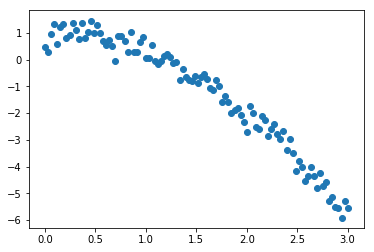

In [9]:
y = p2(x) + 0.3* noise
plt.scatter(x, y)
plt.savefig("./images/model2.pdf")
plt.show()

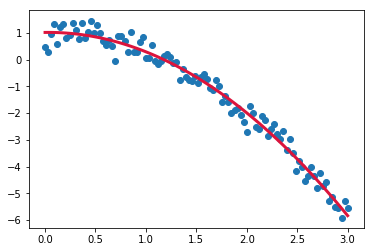

In [10]:
linm2 = LinearRegression()
p = PolynomialFeatures(degree=2)
x2 = p.fit_transform(x)
linm2.fit(x2, y)

plt.scatter(x, y)
plt.plot(x, linm2.predict(x2), c="crimson", linewidth=3)
plt.savefig("./images/model2_fit.pdf")
plt.show()

## Classification Problem

In [17]:
from pydataset import data
import seaborn as sns

In [13]:
iris = data("iris")
iris.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa


In [14]:
iris["area_sepal"] = iris["Sepal.Length"] * iris["Sepal.Width"]
iris["area_petal"] = iris["Petal.Length"] * iris["Petal.Width"]

In [15]:
train, test  = train_test_split(iris[["Species", "area_sepal", "area_petal"]], test_size=0.2)

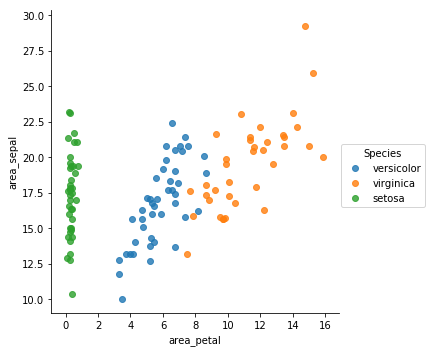

In [18]:
sns.lmplot(x="area_petal", y="area_sepal", hue="Species", data=train, fit_reg=False)
plt.show()

In [19]:
train_x, train_y = train.drop("Species", axis=1).values, train["Species"].values

In [21]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

In [28]:
lreg = LogisticRegression()
lreg.fit(train_x, train_y)

knn = KNeighborsClassifier()
knn.fit(train_x, train_y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [29]:
prediction = knn.predict(test.drop("Species", axis=1).values)
test_y = test.Species

In [30]:
test["Species_pred"] = prediction

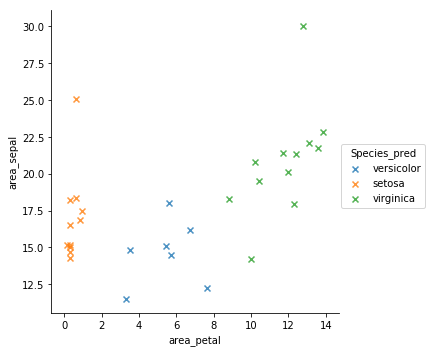

In [34]:
sns.lmplot(x="area_petal", y="area_sepal", hue="Species_pred", fit_reg=False, data=test, markers="x")
plt.savefig("./images/knn_fit.pdf")
plt.show()

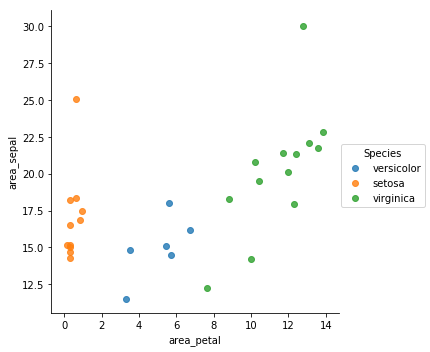

In [35]:
sns.lmplot(x="area_petal", y="area_sepal", hue="Species", fit_reg=False, data=test, markers="o")
plt.savefig("./images/knn_org.pdf")
plt.show()

In [33]:
test.query("Species_pred != Species")

,Species,area_sepal,area_petal,Species_pred
107,virginica,12.25,7.65,versicolor


## Another example

In [20]:
import pickle
with open("inputs.pkl", "rb") as f:
    inputs = pickle.load(f)

import pickle
with open("targets.pkl", "rb") as f:
    targets = pickle.load(f)
    targets = [1 if t[0] == 1 else 0 for t in targets]

In [21]:
xtrain, xtest, ytrain, ytest = train_test_split(inputs, targets, test_size=0.2)

In [23]:
ycol = ["crimson" if y == 1 else "teal" for y in ytrain]

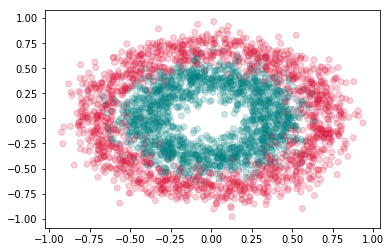

In [86]:
plt.scatter(*xtrain.T, c=ycol, alpha=0.2)
plt.savefig("./images/knn_classify.pdf")
plt.show()

### Logistic Regression Model

In [222]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [227]:
def correct_incorrect_map(ytrue, ypredicted):
    correct = np.where(ypred == ytest)[0]
    incorrect = np.where(ypred != ytest)[0]
    return correct, incorrect

In [223]:
lreg = LogisticRegression()
lreg.fit(xtrain, ytrain)
ypred = lreg.predict(xtest)

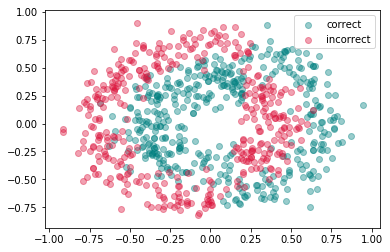

In [228]:
correct, incorrect = correct_incorrect_map(ytest, ypred)

plt.scatter(*xtest[correct,:].T, color="teal", alpha=0.4, label="correct")
plt.scatter(*xtest[incorrect,:].T, color="crimson", alpha=0.4, label="incorrect")
plt.legend()
plt.savefig("./images/knn_pred_lreg.pdf")
plt.show()

In [226]:
# Accuracy over the training dataset
accuracy_score(ytest, ypred)

0.52124999999999999

#### How to correctly predict this dataset?

In [13]:
from numpy import pi, sqrt, arctan

def radius(x, y): return sqrt(x ** 2 + y ** 2)

def theta(x, y):
    """
    Compute the theta in polar coordinates given x, y in
    cartesian coordinates
    """
    theta_prime = arctan(abs(y / x))
    qx = 1 if x < 0 else 0
    qy = -1 if y < 0 else 1
    q = qx + qy
    if q == -1:
        theta = theta_prime
    elif q == 0:
        theta = pi - theta_prime
    elif q == 1:
        theta = pi + theta_prime
    if q == 2:
        theta = 2 * pi - theta_prime
    
    return theta

def make_polar(X):
    """
    Transform an R(nx2) matrix expressed
    as points in cartesian coordinates into
    polar coordinates    
    """
    R = []
    T = []
    for row in X:
        x, y = row
        R.append(radius(x, y))
        T.append(theta(x, y))
    return np.c_[R, T]

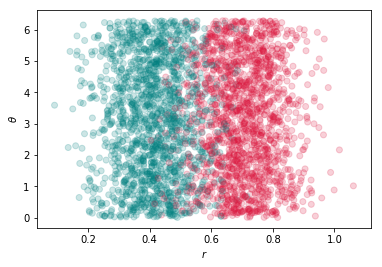

In [256]:
colors = ["crimson" if c==1 else "teal" for c in ytrain]
plt.scatter(*make_polar(xtrain).T, color=colors, alpha=0.2)
plt.xlabel("$r$")
plt.ylabel(r"$\theta$")
plt.savefig("./images/knn_classify_polar.pdf")
plt.show()

In [248]:
xtrain_polar = make_polar(xtrain)
xtest_polar = make_polar(xtest)

lreg.fit(xtrain_polar, ytrain)
ypred_polar = lreg.predict(xtest_polar)

correct, incorrect = correct_incorrect_map(ytest, ypred_polar)

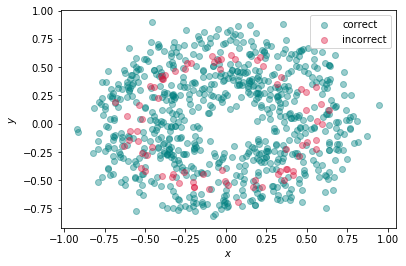

In [262]:
plt.scatter(*xtest[correct,:].T, color="teal", alpha=0.4, label="correct")
plt.scatter(*xtest[incorrect,:].T, color="crimson", alpha=0.4, label="incorrect")
plt.legend()
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.savefig("./images/knn_pred_lreg_polar.pdf")
plt.show()

In [257]:
accuracy_score(ytest, ypred_polar)

0.92125000000000001

### KNN Model

In [258]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(xtrain, ytrain)
ypred = knn.predict(xtest)

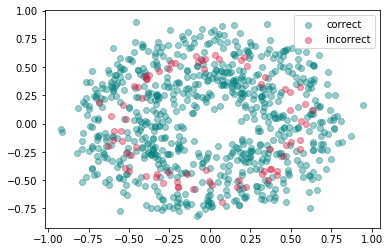

In [259]:
correct = np.where(ypred == ytest)[0]
incorrect = np.where(ypred != ytest)[0]

plt.scatter(*xtest[correct,:].T, color="teal", alpha=0.4, label="correct")
plt.scatter(*xtest[incorrect,:].T, color="crimson", alpha=0.4, label="incorrect")
plt.legend()
plt.savefig("./images/knn_pred_knn.pdf")
plt.show()

In [261]:
accuracy_score(ytest, ypred)

0.90625

# Neural Networks 

In [14]:
from sklearn.datasets import fetch_mldata

In [15]:
mnist = fetch_mldata("MNIST original")

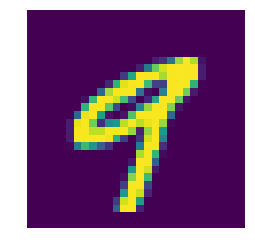

In [16]:
plt.imshow(mnist["data"][-3].reshape(28,28))
plt.axis("off")
plt.savefig(f"./images/MNIST1.pdf", bbox_inches="tight")
plt.show()

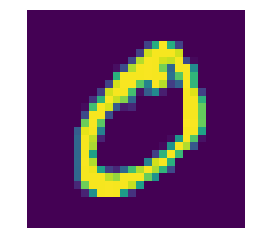

In [264]:
plt.imshow(mnist["data"][0].reshape(28,28))
plt.axis("off")
plt.savefig(f"./images/MNIST2.pdf", bbox_inches="tight")
plt.show()

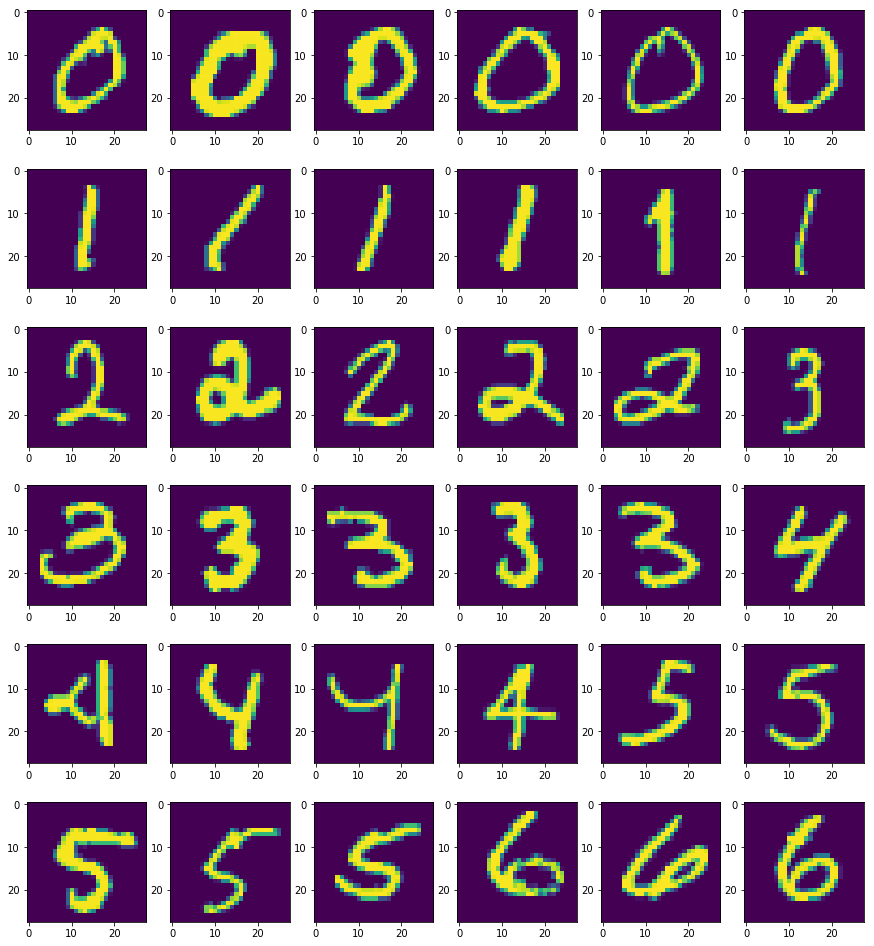

In [207]:
fig = plt.figure(figsize=(15,17))
nrc = 6
for i in range(nrc**2):
    ax = fig.add_subplot(nrc, nrc, i+1)
    number = mnist["data"][i * 1100].reshape(28, 28)
    ax.imshow(number)
plt.savefig("./images/mnist_examples.pdf")
plt.show()

# Error reduction

In [23]:
f = lambda x: x ** 2
dfx = lambda x: 2 * x

In [22]:
def gdesc_path(xa, df, alpha=0.001, epsilon=1e-5, nlim=50):
    path = [xa]
    counter = 1
    while True:
        xb, xa =xa, xa - alpha * df(xa)
        path.append(xa)
        if abs(xa - xb) < epsilon or counter > nlim:
            return np.array(path)
        counter += 1
        
def plot_gdesc(x, f, df, x0, alpha, title=None, **kwargs):
    X = gdesc_path(x0, df, alpha, **kwargs)
    if title is not None:
        plt.title(title)
    plt.plot(x, f(x))
    plt.scatter(X, f(X), color="crimson", label=r"$\alpha={}$".format(alpha))
    plt.plot(X, f(X), color="crimson")
    plt.scatter(x0, f(x0), color="green")
    plt.legend()

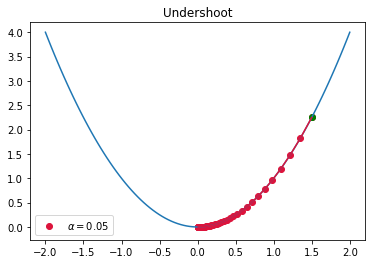

In [24]:
x = np.linspace(-2, 2, 100)
plot_gdesc(x, f, dfx, 1.5, 0.05, "Undershoot")
plt.savefig("./images/undershoot.pdf")
plt.show()

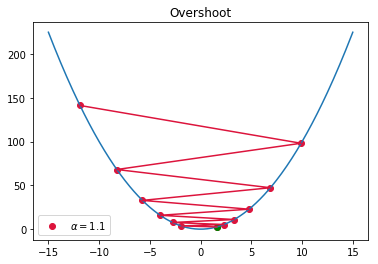

In [25]:
x = np.linspace(-15, 15, 300)
plot_gdesc(x, f, dfx, 1.6, 1.1, "Overshoot", nlim=10)
plt.savefig("./images/overshoot.pdf")
plt.show()

## Training the Neural Network

In [26]:
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import OneHotEncoder

In [71]:
mtrainx, mtestx, mtrainy, mtesty = train_test_split(mnist["data"], mnist["target"], test_size=0.2)
mtrainx, mtrainy = mnist["data"][:60000], mnist["target"][:60000]
mtestx, mtesty = mnist["data"][60000:], mnist["target"][60000:]

ohe = OneHotEncoder(sparse=False)
mtrainy = ohe.fit_transform(mtrainy.reshape(-1,1))
mtesty = ohe.fit_transform(mtesty.reshape(-1,1))

In [73]:
nnet = MLPClassifier(hidden_layer_sizes=(100, 200, 100), activation="relu", solver="adam", verbose=True)

In [74]:
nnet.fit(mtrainx, mtrainy)

Iteration 1, loss = 2.60151234
Iteration 2, loss = 0.54733360
Iteration 3, loss = 0.36430329
Iteration 4, loss = 0.27585759
Iteration 5, loss = 0.21542644
Iteration 6, loss = 0.18325623
Iteration 7, loss = 0.16163538
Iteration 8, loss = 0.13470885
Iteration 9, loss = 0.12264121
Iteration 10, loss = 0.11509424
Iteration 11, loss = 0.09949983
Iteration 12, loss = 0.10144177
Iteration 13, loss = 0.10027703
Iteration 14, loss = 0.09497483
Iteration 15, loss = 0.08394189
Iteration 16, loss = 0.08441209
Iteration 17, loss = 0.08213483
Iteration 18, loss = 0.07432972
Iteration 19, loss = 0.07655511
Iteration 20, loss = 0.06546168
Iteration 21, loss = 0.06157173
Iteration 22, loss = 0.05923063
Iteration 23, loss = 0.05902301
Iteration 24, loss = 0.06699657
Iteration 25, loss = 0.05813589
Iteration 26, loss = 0.04171141
Iteration 27, loss = 0.03888819
Iteration 28, loss = 0.03857758
Iteration 29, loss = 0.05599144
Iteration 30, loss = 0.03861730
Iteration 31, loss = 0.04680147
Training loss did

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100, 200, 100), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=True, warm_start=False)

In [37]:
import re

In [75]:
words="""Iteration 1, loss = 2.60151234
Iteration 2, loss = 0.54733360
Iteration 3, loss = 0.36430329
Iteration 4, loss = 0.27585759
Iteration 5, loss = 0.21542644
Iteration 6, loss = 0.18325623
Iteration 7, loss = 0.16163538
Iteration 8, loss = 0.13470885
Iteration 9, loss = 0.12264121
Iteration 10, loss = 0.11509424
Iteration 11, loss = 0.09949983
Iteration 12, loss = 0.10144177
Iteration 13, loss = 0.10027703
Iteration 14, loss = 0.09497483
Iteration 15, loss = 0.08394189
Iteration 16, loss = 0.08441209
Iteration 17, loss = 0.08213483
Iteration 18, loss = 0.07432972
Iteration 19, loss = 0.07655511
Iteration 20, loss = 0.06546168
Iteration 21, loss = 0.06157173
Iteration 22, loss = 0.05923063
Iteration 23, loss = 0.05902301
Iteration 24, loss = 0.06699657
Iteration 25, loss = 0.05813589
Iteration 26, loss = 0.04171141
Iteration 27, loss = 0.03888819
Iteration 28, loss = 0.03857758
Iteration 29, loss = 0.05599144
Iteration 30, loss = 0.03861730
Iteration 31, loss = 0.04680147""".split("\n")


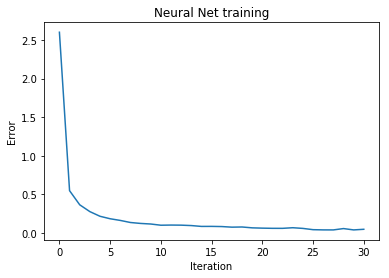

In [76]:
error = [float(re.sub(r"Iteration [1-9][0-9]?, loss = ", "", w)) for w in words]
plt.plot(error)
plt.xlabel("Iteration")
plt.ylabel("Error")
plt.title("Neural Net training")
plt.savefig("./images/nnet_train.pdf")
plt.show()

In [77]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [91]:
accuracy_score(nnet.predict(mtrainx), mtrainy)

0.99033333333333329

In [79]:
import seaborn as sns

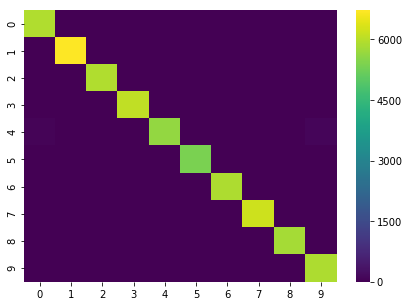

In [90]:
org = mtrainy @ ohe.active_features_.reshape(-1,1)
plt.figure(figsize=(7,5))
pred = nnet.predict(mtrainx) @ ohe.active_features_.reshape(-1,1)
sns.heatmap(confusion_matrix(org, pred)[:10,:10], cmap="viridis")
plt.savefig("./images/nnet_cm_train.pdf")
plt.show()

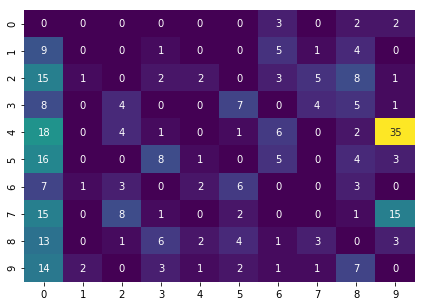

In [196]:
plt.figure(figsize=(7,5))

org = mtesty @ ohe.active_features_.reshape(-1,1)
pred = nnet.predict(mtestx) @ ohe.active_features_.reshape(-1,1)
cmat_errors = confusion_matrix(org, pred)[:10,:10]
cmat_errors[np.diag_indices_from(cmat_errors)] = 0
sns.heatmap(cmat_errors, cmap="viridis", annot=True, cbar=False)
plt.savefig("./images/nnet_cm_test_error_analysis.pdf")
plt.show()

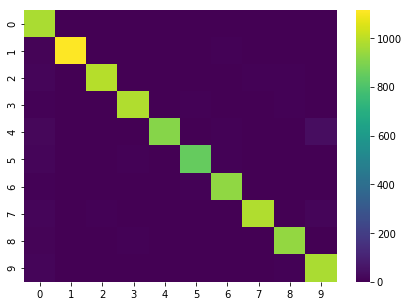

In [197]:
plt.figure(figsize=(7,5))

org = mtesty @ ohe.active_features_.reshape(-1,1)
pred = nnet.predict(mtestx) @ ohe.active_features_.reshape(-1,1)
sns.heatmap(confusion_matrix(org, pred)[:10,:10], cmap="viridis")
plt.savefig("./images/nnet_cm_test.pdf")
plt.show()

In [176]:
accuracy_score(nnet.predict(mtestx), mtesty)

0.96309999999999996

In [131]:
confusion_matrix(org, pred)[:10,:10]

array([[ 973,    0,    0,    0,    0,    0,    3,    0,    2,    2],
       [   9, 1115,    0,    1,    0,    0,    5,    1,    4,    0],
       [  15,    1,  992,    2,    2,    0,    3,    5,    8,    1],
       [   8,    0,    4,  980,    0,    7,    0,    4,    5,    1],
       [  18,    0,    4,    1,  913,    1,    6,    0,    2,   35],
       [  16,    0,    0,    8,    1,  851,    5,    0,    4,    3],
       [   7,    1,    3,    0,    2,    6,  930,    0,    3,    0],
       [  15,    0,    8,    1,    0,    2,    0,  982,    1,   15],
       [  13,    0,    1,    6,    2,    4,    1,    3,  936,    3],
       [  14,    2,    0,    3,    1,    2,    1,    1,    7,  974]])

In [132]:
error_index = np.where(org != pred)[0]

In [180]:
import pandas as pd
pd.DataFrame(np.c_[org[error_index][:25], pred[error_index][:25]], columns=["true", "predicted"]).to_csv("mnist_error_result.csv")

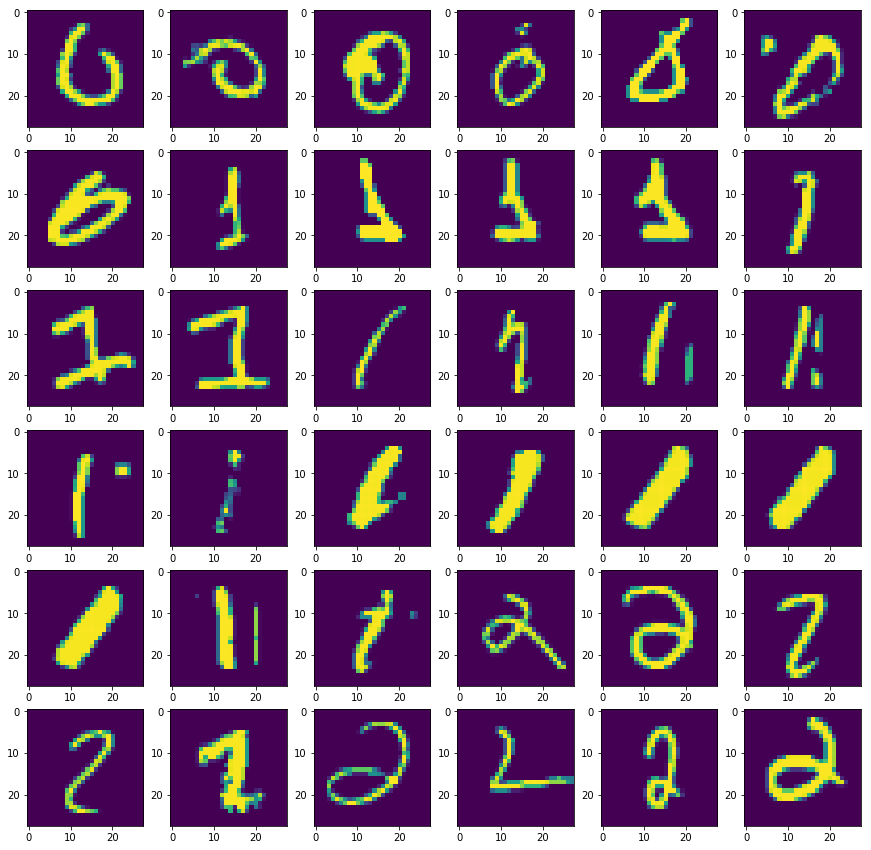

In [173]:
fig = plt.figure(figsize=(15,15))
for i in range(0,36):
    ax = fig.add_subplot(6,6,i+1)
    ax.imshow(mtestx[error_index[i]].reshape(28,28))
plt.savefig("./images/nnet_errors.pdf")
plt.show()

### Neural Net architecture

In [7]:
import matplotlib.pyplot as plt
from drawnet import draw_neural_net
fig = plt.figure(figsize=(20, 20))
draw_neural_net(fig.gca(), .1, .9, .1, .9, [70, 10, 20, 10, 5])

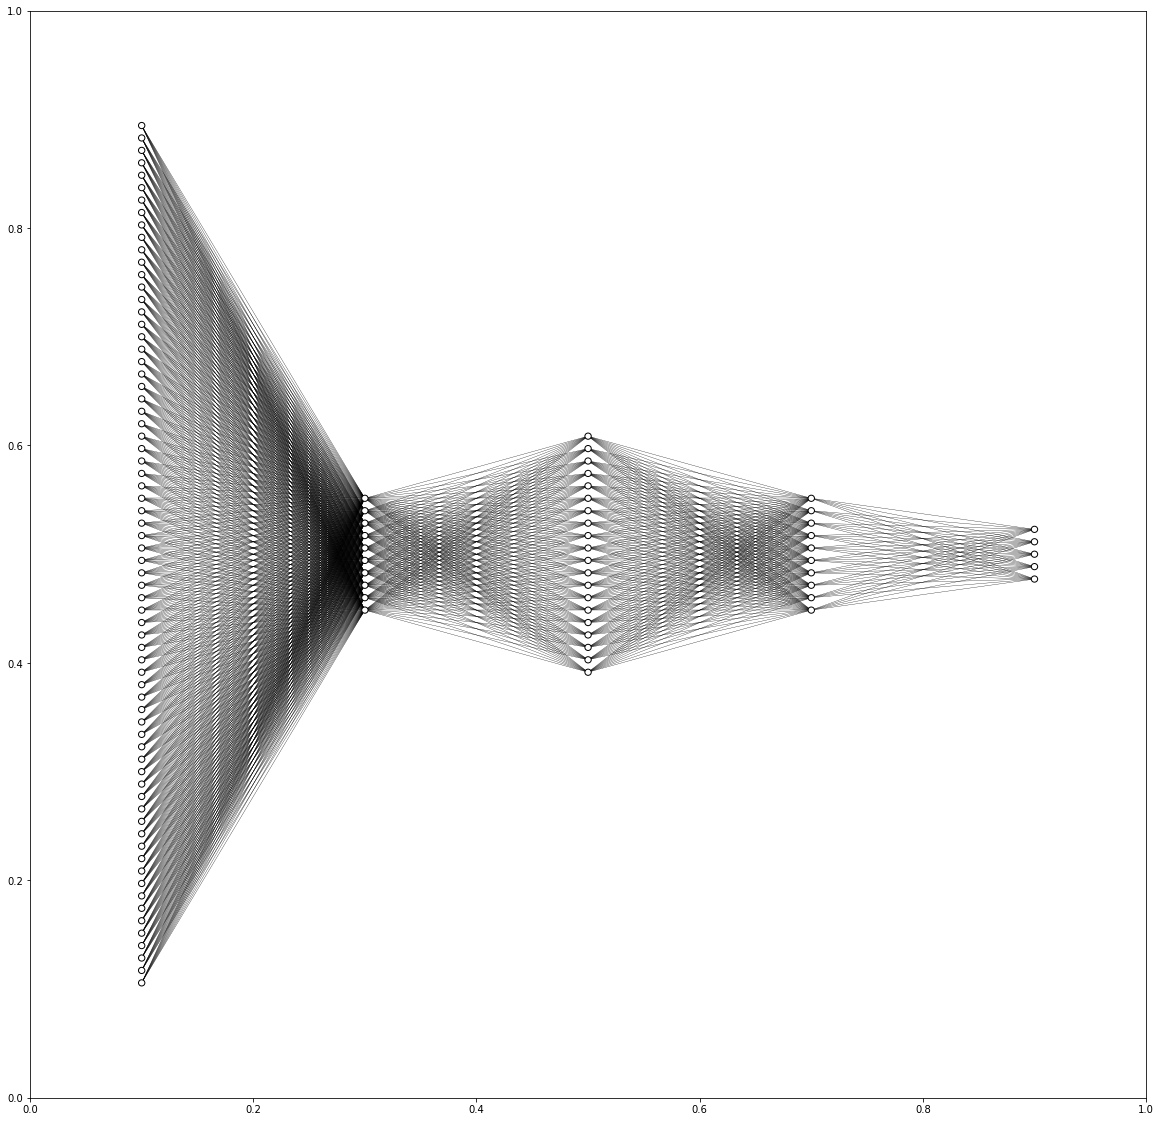

In [8]:
plt.savefig("./images/mnist_nnet.pdf")
plt.show()